# 1. Leitura da imagem a cálculo da transformada de Fourier

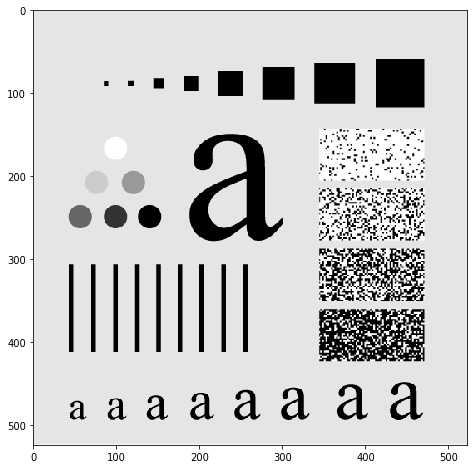

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftfreq, fftshift

def generate_frequencies(num_rows, num_cols):

    freq_r = fftfreq(num_rows)
    freq_c = fftfreq(num_cols)
    freq_r = fftshift(freq_r)
    freq_c = fftshift(freq_c)  

    return freq_r, freq_c

img = plt.imread('test_image.tiff')
plt.figure(figsize=[8,8])
plt.imshow(img, 'gray')

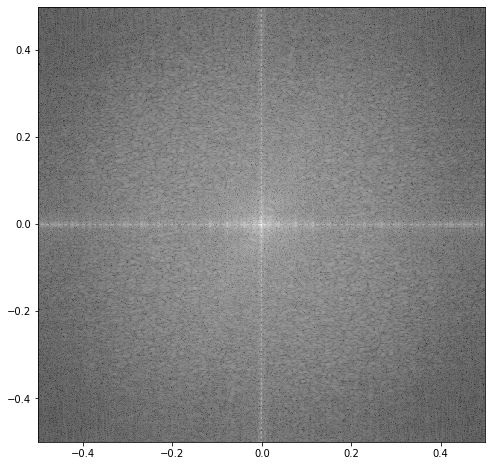

In [2]:
num_rows, num_cols = img.shape
# Adiciona zeros ao final da imagem
img_padded = np.pad(img, ((0, num_rows), (0, num_cols)), mode='constant', 
                        constant_values=0)

Fimg = fft2(img_padded)
freq_r, freq_c = generate_frequencies(2*num_rows, 2*num_cols)

Fimg = fftshift(Fimg)
plt.figure(figsize=[8,8])
plt.pcolormesh(freq_c, freq_r, np.log(np.abs(Fimg)), cmap='gray')

# 2. Filtro passa-alta gaussiano

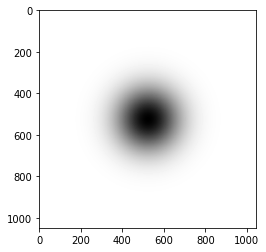

In [3]:
# Poderíamos simplesmente inverter um filtro passa-baixa gaussiano
def filtro_passa_alta_gaussiano(img, sigma_r, sigma_c):
    num_rows, num_cols = img.shape
    freq_r, freq_c = generate_frequencies(num_rows, num_cols)   
    
    high_pass_gauss_filter = np.zeros([num_rows, num_cols])
    for row in range(num_rows):
        for col in range(num_cols):
            exponent = (freq_r[row]**2/(2*sigma_r**2) + 
                            freq_c[col]**2/(2*sigma_c**2))
            high_pass_gauss_filter[row, col] = np.exp(-exponent)
    return 1-high_pass_gauss_filter

hp_filter = filtro_passa_alta_gaussiano(img_padded, sigma_r=0.1, sigma_c=0.1)
plt.imshow(hp_filter, 'gray')

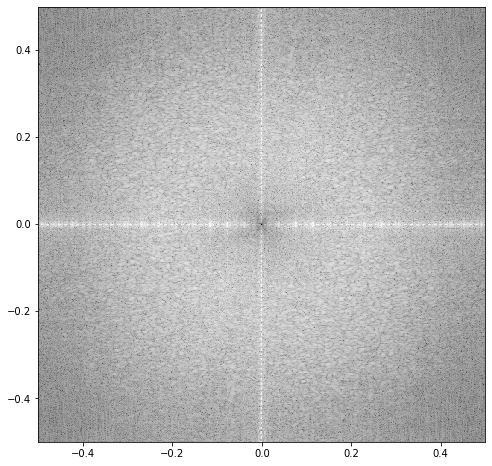

In [4]:
Fimg_filtered = hp_filter*Fimg
plt.figure(figsize=[8,8])
plt.pcolormesh(freq_c, freq_r, np.log(np.abs(Fimg_filtered)+1), cmap='gray')

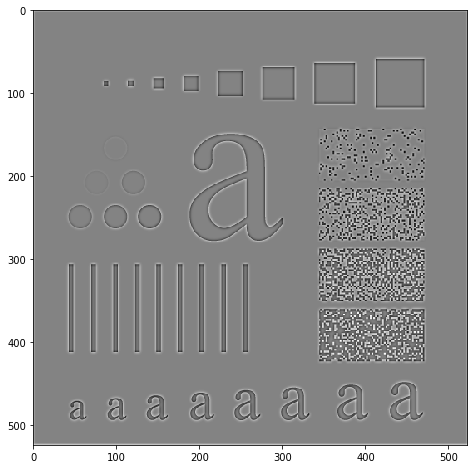

In [5]:
Fimg_filtered_sh = fftshift(Fimg_filtered)
img_filtered = np.real(ifft2(Fimg_filtered_sh))
img_filtered = img_filtered[:num_rows, :num_cols]
plt.figure(figsize=[8,8])
plt.imshow(img_filtered, 'gray')

# 3. Filtro passa-alta laplaciano

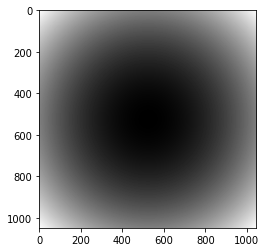

In [6]:
def filtro_passa_alta_laplaciano(img):
    num_rows, num_cols = img.shape
    freq_r, freq_c = generate_frequencies(num_rows, num_cols) 
    
    lap_filter = np.zeros([num_rows, num_cols])
    for row in range(num_rows):
        for col in range(num_cols):
            lap_filter[row, col] = 4*np.pi*(freq_r[row]**2 + freq_c[col]**2)
    return lap_filter

lap_filter = filtro_passa_alta_laplaciano(img_padded)
plt.imshow(lap_filter, 'gray')

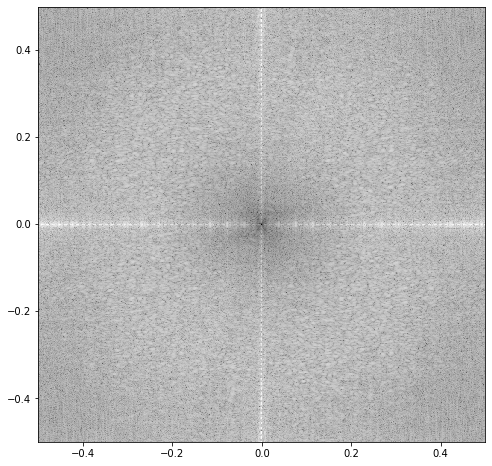

In [7]:
Fimg_filtered = lap_filter*Fimg
plt.figure(figsize=[8,8])
plt.pcolormesh(freq_c, freq_r, np.log(np.abs(Fimg_filtered)+1), cmap='gray')

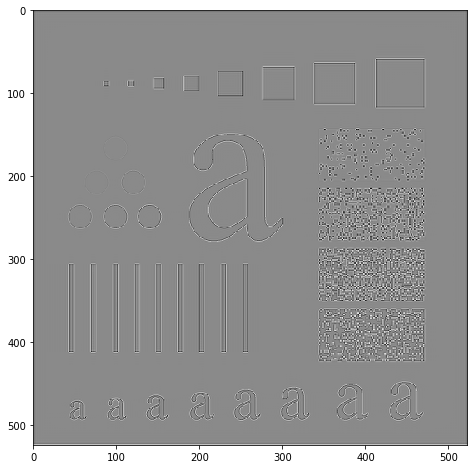

In [8]:
Fimg_filtered = fftshift(Fimg_filtered)
img_filtered = np.real(ifft2(Fimg_filtered))
img_filtered = img_filtered[:num_rows, :num_cols]
plt.figure(figsize=[8,8])
plt.imshow(img_filtered, 'gray')